In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import svm

from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

# from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc, roc_auc_score, plot_precision_recall_curve
from mlxtend.plotting import plot_decision_regions

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

In [0]:
X_1, y_1 =make_classification(n_samples=5000, n_features=5, n_informative=3, n_clusters_per_class=1, random_state=97, class_sep=2, flip_y=0.1, n_classes=5)

In [0]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1,test_size = 0.3)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
test_accs = []
train_accs = []
l = np.linspace(0.00000001, 0.01 , 25)
for j in l:
  
    mod_tree = DecisionTreeClassifier(ccp_alpha = j)
    mod_tree.fit(X_1_train,y_1_train)
    accuracy_test = mod_tree.score(X_1_test,y_1_test)
    test_accs.append(accuracy_test )
    accuracy_train = mod_tree.score(X_1_train,y_1_train)
    train_accs.append(accuracy_train)

    print("j:", j)
    print("accuracy_test - > ", accuracy_test)
    print("accuracy_train - > ", accuracy_train)

j: 1e-08
accuracy_test - >  0.818
accuracy_train - >  1.0
j: 0.00041667625
accuracy_test - >  0.8753333333333333
accuracy_train - >  0.922
j: 0.0008333425000000001
accuracy_test - >  0.8926666666666667
accuracy_train - >  0.9037142857142857
j: 0.00125000875
accuracy_test - >  0.8933333333333333
accuracy_train - >  0.9008571428571429
j: 0.001666675
accuracy_test - >  0.8906666666666667
accuracy_train - >  0.8982857142857142
j: 0.00208334125
accuracy_test - >  0.892
accuracy_train - >  0.8974285714285715
j: 0.0025000075
accuracy_test - >  0.892
accuracy_train - >  0.8974285714285715
j: 0.0029166737500000003
accuracy_test - >  0.8913333333333333
accuracy_train - >  0.8968571428571429
j: 0.00333334
accuracy_test - >  0.8873333333333333
accuracy_train - >  0.8951428571428571
j: 0.00375000625
accuracy_test - >  0.8846666666666667
accuracy_train - >  0.8931428571428571
j: 0.0041666725
accuracy_test - >  0.8846666666666667
accuracy_train - >  0.8931428571428571
j: 0.004583338750000001
accuracy

In [49]:
print("cpp :", l[np.argmax(test_accs)] , "  max test acc -> ", np.max(test_accs))

cpp : 0.00125000875   max test acc ->  0.8933333333333333


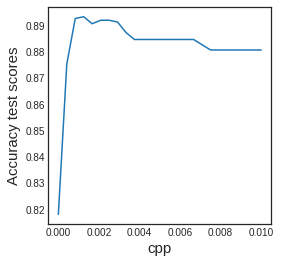

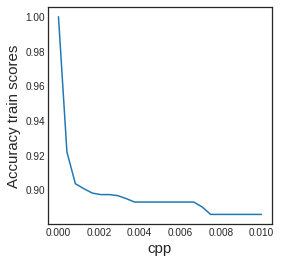

In [42]:
plt.figure(figsize = (4,4)) 
plt.plot(l, test_accs)
plt.xlabel("cpp", fontsize = 15)
plt.ylabel("Accuracy test scores", fontsize = 15)
plt.figure(figsize = (4,4)) 
plt.plot(l, train_accs)
plt.xlabel("cpp", fontsize = 15)
plt.ylabel("Accuracy train scores", fontsize = 15)
plt.show()

In [0]:
# maxt test accuracy is for ccp_alpha = 0.00125000875
# optimal val is ccp_alpha = 0.00125000875
# cpp: 0.00125000875
# accuracy_test - >  0.8933333333333333
# accuracy_train - >  0.9008571428571429

In [50]:
Class_A = DecisionTreeClassifier(ccp_alpha = 0.00125000875)

Class_A.fit(X_1_train, y_1_train)

train_score = Class_A.score(X_1_train, y_1_train)
test_score = Class_A.score(X_1_test, y_1_test)

print("Train score:", train_score)
print("Test score:", test_score)

A_train_pred = Class_A.predict(X_1_train)
A_test_pred = Class_A.predict(X_1_test)

print(classification_report(y_1_train, A_train_pred))
print(classification_report(y_1_test, A_test_pred))

Train score: 0.9008571428571429
Test score: 0.8933333333333333
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       693
           1       0.89      0.90      0.90       706
           2       0.91      0.90      0.90       690
           3       0.91      0.91      0.91       696
           4       0.90      0.90      0.90       715

    accuracy                           0.90      3500
   macro avg       0.90      0.90      0.90      3500
weighted avg       0.90      0.90      0.90      3500

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       314
           1       0.87      0.87      0.87       289
           2       0.89      0.88      0.88       307
           3       0.91      0.89      0.90       301
           4       0.90      0.91      0.90       289

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg  

In [0]:
# for class 0 it hes the best caracteristics

In [0]:
X_2, y_2 = make_regression(n_samples =5000, n_features = 20, n_informative = 3, random_state = 97, noise = 10)

In [0]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2,test_size = 0.3, random_state = 0)

In [61]:

train_accs = []
test_accs = []
gamma_grid = [0.000001, 0.0001, 0.01, 0.1, 1, 10, 100]
c_param_grid = np.linspace(0.001, 100, 7)


for i in range (7):
  class_svr = svm.SVR(kernel = "rbf", C = c_param_grid[i],gamma = gamma_grid[i] )
  class_svr.fit(X_2_train,y_2_train)
  accuracy_test = class_svr.score(X_2_test,y_2_test)
  test_accs.append(accuracy_test )
  accuracy_train = class_svr.score(X_2_train,y_2_train)
  train_accs.append(accuracy_train)

  print(i, "---")
  print("gamma:", gamma_grid[i] )
  print("C:", c_param_grid[i])
  print("accuracy_test - > ", accuracy_test)
  print("accuracy_train - > ", accuracy_train)



0 ---
gamma: 1e-06
C: 0.001
accuracy_test - >  -7.666123103322597e-05
accuracy_train - >  -0.0006127958493273855
1 ---
gamma: 0.0001
C: 16.6675
accuracy_test - >  0.18281286686718132
accuracy_train - >  0.18273501411442017
2 ---
gamma: 0.01
C: 33.333999999999996
accuracy_test - >  0.9838325801611089
accuracy_train - >  0.9869602524097671
3 ---
gamma: 0.1
C: 50.000499999999995
accuracy_test - >  0.8642990197733197
accuracy_train - >  0.9617870966004969
4 ---
gamma: 1
C: 66.667
accuracy_test - >  -0.0005179188962372017
accuracy_train - >  0.7163108244158788
5 ---
gamma: 10
C: 83.3335
accuracy_test - >  -0.00097446063072959
accuracy_train - >  0.8019969199178794
6 ---
gamma: 100
C: 100.0
accuracy_test - >  -0.0011088421508302915
accuracy_train - >  0.864336018649029


In [62]:
print("gamma :", gamma_grid[np.argmax(test_accs)] , "    C:", c_param_grid[i],"    max test acc -> ", np.max(test_accs))


gamma : 0.01     C: 100.0     max test acc ->  0.9838325801611089


In [0]:
# optimal -------
# gamma: 0.01
# C: 33.333999999999996
# accuracy_test - >  0.9838325801611089
# accuracy_train - >  0.9869602524097671

In [69]:
Reg_Full = svm.SVR(kernel = "rbf", C = 33.333999999999996, gamma = 0.01 )
Reg_Full.fit(X_2_train,y_2_train)

train_score = Reg_Full.score(X_2_train, y_2_train)
test_score = Reg_Full.score(X_2_test, y_2_test)

print("Train score:", train_score)
print("Test score:", test_score)


Train score: 0.9869602524097671
Test score: 0.9838325801611089


In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets as dt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
import time
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler

In [77]:
model_pca = PCA(n_components = 7)
print(model_pca)
# The loading vectors
mod_pca = PCA()
print(mod_pca)
mod_pca_fit = mod_pca.fit(X_2)
mod_pca_fit.components_

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


array([[-0.219029  ,  0.06925233,  0.36330767,  0.10889138,  0.22156793,
         0.35132233,  0.20963889, -0.29869611,  0.1182204 , -0.27043343,
         0.24011368,  0.27967001,  0.27056839,  0.16388388, -0.02204947,
         0.13809286,  0.21729219,  0.1945295 ,  0.08605376, -0.25025786],
       [ 0.21077261,  0.22665979,  0.27961483, -0.43352567, -0.13015342,
        -0.10888786,  0.03953467,  0.16909751,  0.25606503,  0.20838057,
         0.13394342,  0.29727746, -0.24707723,  0.29224789, -0.19690306,
         0.07880702,  0.04002374,  0.29140472, -0.22892838,  0.18288576],
       [ 0.25118774,  0.09023622,  0.24463479, -0.30099134,  0.12893518,
         0.04204235, -0.08016879,  0.02577279, -0.15775394, -0.30693738,
        -0.20246337,  0.12328302,  0.1729021 , -0.34047758,  0.12789213,
        -0.30711241,  0.28746144, -0.25050329, -0.41912881, -0.00077269],
       [ 0.0216409 ,  0.06731252,  0.13496501,  0.08227451, -0.16056504,
         0.03333533,  0.01667567, -0.23650467,  

In [78]:
# Standard deviation of the four principal components
np.sqrt(mod_pca.explained_variance_)

array([1.04611536, 1.04304993, 1.03535514, 1.03293248, 1.03121611,
       1.02115704, 1.01209331, 1.00599065, 1.00233777, 0.998433  ,
       0.99570286, 0.99242914, 0.98915702, 0.9818315 , 0.97530952,
       0.97286683, 0.96108638, 0.95871022, 0.95412209, 0.93934086])

In [79]:
np.cumsum(mod_pca.explained_variance_ratio_)

array([0.05494514, 0.10956873, 0.16338937, 0.21695842, 0.2703496 ,
       0.32270424, 0.37413361, 0.42494464, 0.47538734, 0.52543778,
       0.57521489, 0.62466521, 0.67378998, 0.72218984, 0.76994882,
       0.81746887, 0.86384505, 0.90999219, 0.95569869, 1.        ])

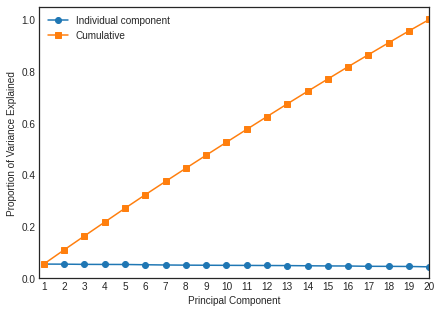

In [87]:
plt.figure(figsize=(7,5))

plt.plot([1, 2, 3, 4,5, 6,7,8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ], mod_pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4,5, 6,7,8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ], np.cumsum(mod_pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1, 2, 3, 4,5, 6,7,8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ])
plt.legend(loc=2);

In [0]:
X_2_PCA_N = mod_pca_fit.components_[:7]